In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,  StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
df_train = pd.read_csv("/content/DS_ML Coding Challenge Dataset (1).xlsx - Training Dataset.csv")

In [8]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB
None


In [9]:
df_train.head(10)

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76
5,NTM1,X1,A10,DIRECT,Large,Powder,Sep-20,137.93
6,NTM2,X1,A19,DIRECT,Large,Powder,Sep-20,105.59
7,NTM2,X1,A29,DIRECT,Small,Powder,Mar-21,90.78
8,NTM3,X1,A18,RETAIL,Large,Liquid,Nov-20,154.04
9,NTM3,X2,A20,DIRECT,Large,Powder,Mar-21,85.71


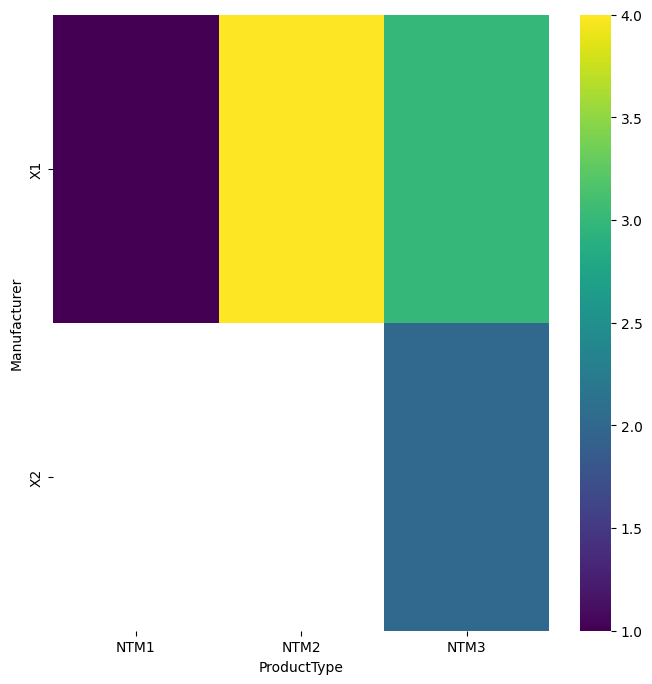

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Manufacturer'].value_counts()
    for x_label, grp in _df_6.groupby('ProductType')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ProductType')
_ = plt.ylabel('Manufacturer')

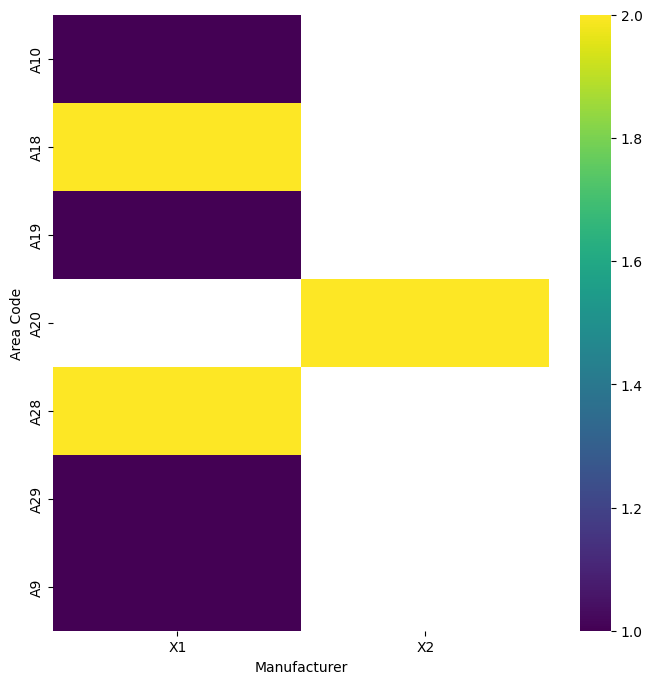

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Area Code'].value_counts()
    for x_label, grp in _df_7.groupby('Manufacturer')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Manufacturer')
_ = plt.ylabel('Area Code')

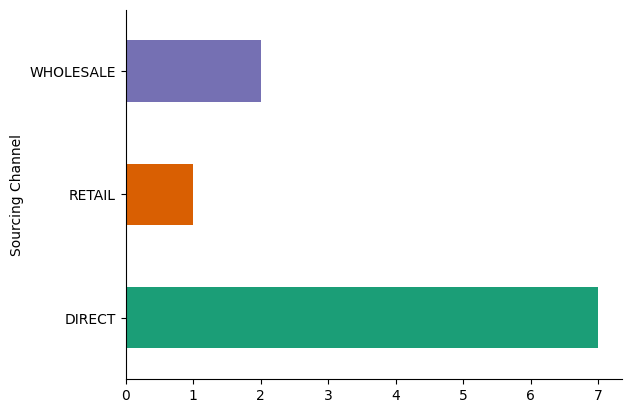

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Sourcing Channel').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

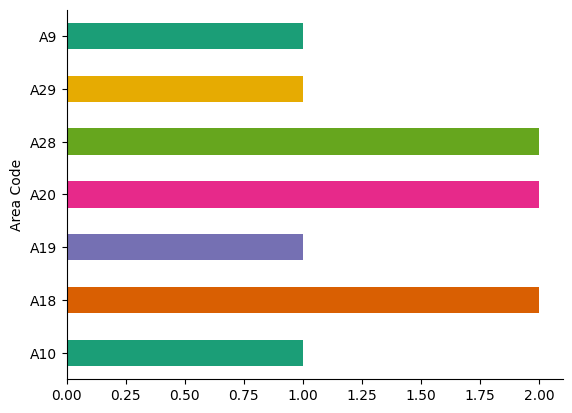

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Area Code').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

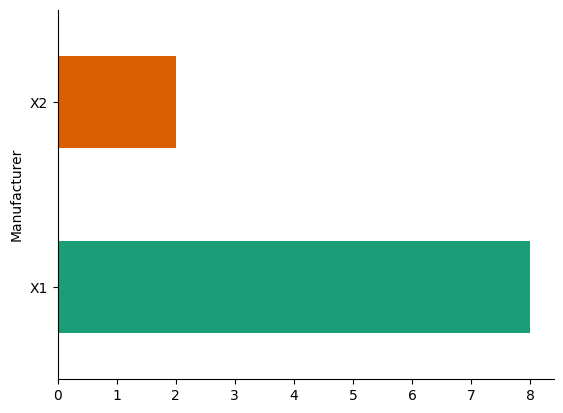

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Manufacturer').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

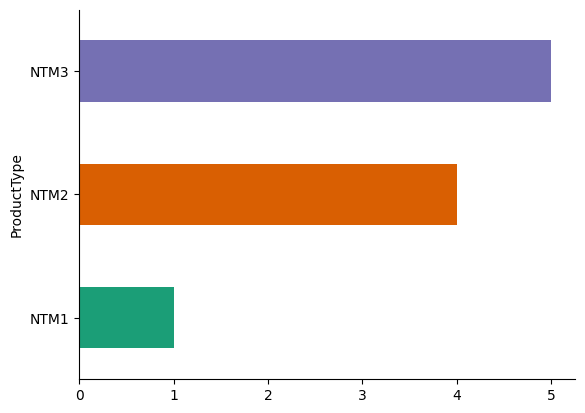

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('ProductType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

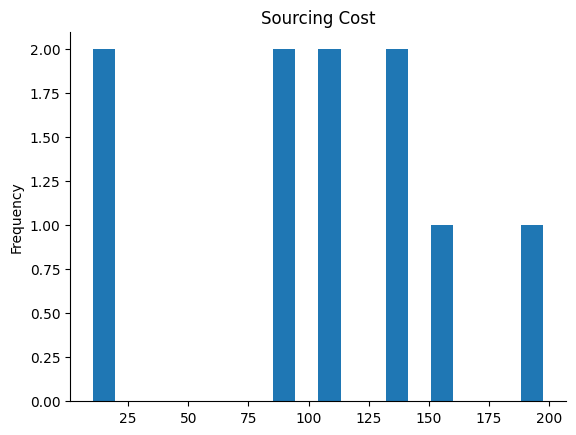

In [16]:
from matplotlib import pyplot as plt
_df_0['Sourcing Cost'].plot(kind='hist', bins=20, title='Sourcing Cost')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
for col in df_train.columns:
    print(col)

ProductType
Manufacturer
Area Code
Sourcing Channel
Product Size
Product Type
Month of Sourcing
Sourcing Cost


In [18]:
print(df_train.isnull().sum())

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64


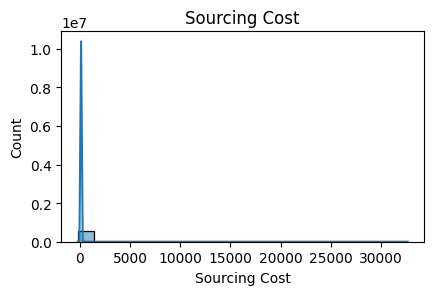

In [19]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_train.select_dtypes(include='float64').columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_train[col], bins=20, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

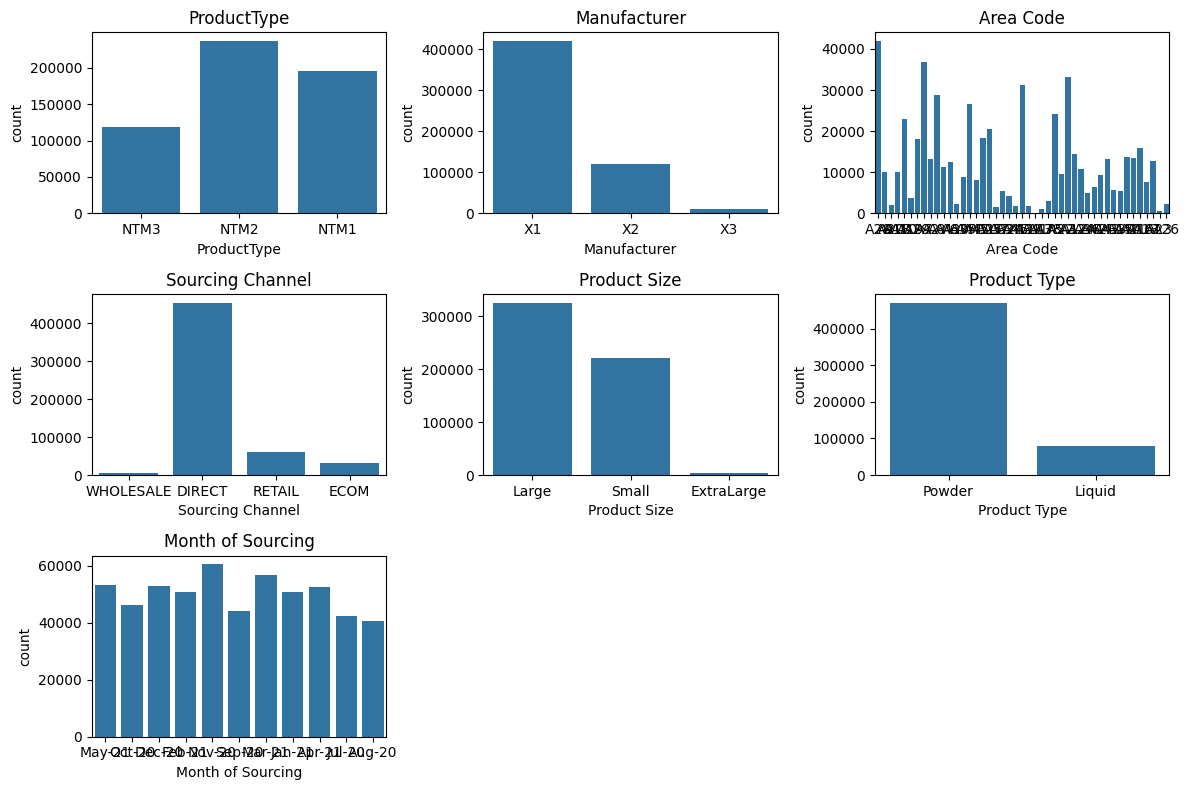

In [20]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_train.select_dtypes(include='object').columns):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df_train, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

In [21]:
df_train['Month of Sourcing'] = pd.to_datetime(df_train['Month of Sourcing'], format='%b-%y')

In [22]:
df_train.head(10)

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.76
5,NTM1,X1,A10,DIRECT,Large,Powder,2020-09-01,137.93
6,NTM2,X1,A19,DIRECT,Large,Powder,2020-09-01,105.59
7,NTM2,X1,A29,DIRECT,Small,Powder,2021-03-01,90.78
8,NTM3,X1,A18,RETAIL,Large,Liquid,2020-11-01,154.04
9,NTM3,X2,A20,DIRECT,Large,Powder,2021-03-01,85.71


In [23]:
print(df_train.describe())

                   Month of Sourcing  Sourcing Cost
count                         550176  550176.000000
mean   2020-12-08 10:27:28.769848576     108.817286
min              2020-07-01 00:00:00    -196.070000
25%              2020-10-01 00:00:00      57.000000
50%              2020-12-01 00:00:00     132.000000
75%              2021-03-01 00:00:00     146.150000
max              2021-05-01 00:00:00   32632.500000
std                              NaN     104.390093


In [24]:
df_train['Year'] = df_train['Month of Sourcing'].dt.year
df_train['Month'] = df_train['Month of Sourcing'].dt.month

In [25]:
df_train = df_train.drop(columns=['Month of Sourcing'])

In [26]:
label_encoder = LabelEncoder()

In [27]:
categorical_cols = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']

In [28]:
for col in categorical_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col])

In [29]:
df_train.head(10)

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost,Year,Month
0,2,0,19,3,1,1,10.16,2021,5
1,1,0,44,0,1,1,134.28,2020,10
2,2,1,12,0,1,1,12.46,2020,12
3,2,0,9,3,2,1,107.22,2021,2
4,1,0,19,0,1,0,197.76,2020,11
5,0,0,1,0,1,1,137.93,2020,9
6,1,0,10,0,1,1,105.59,2020,9
7,1,0,20,0,2,1,90.78,2021,3
8,2,0,9,2,1,0,154.04,2020,11
9,2,1,12,0,1,1,85.71,2021,3


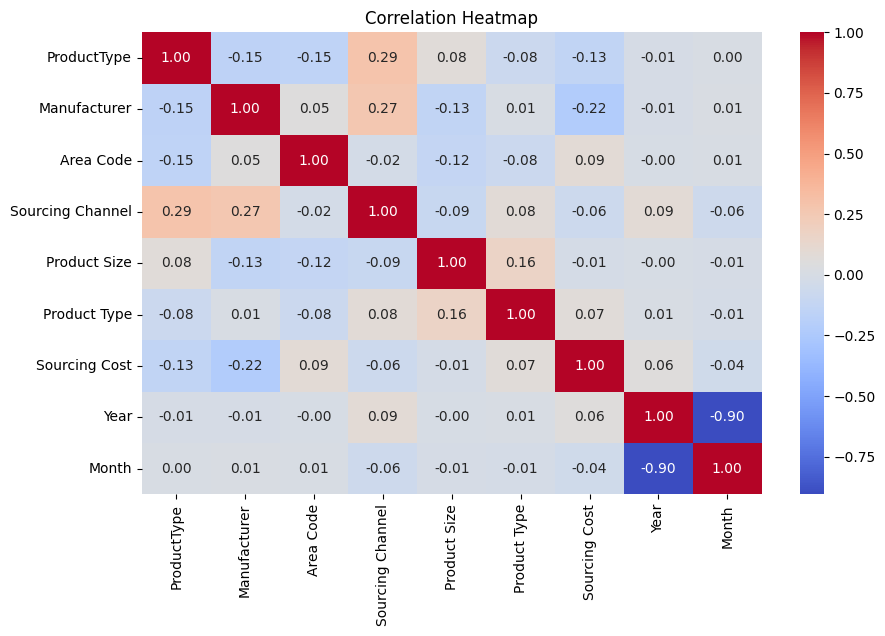

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x600 with 0 Axes>

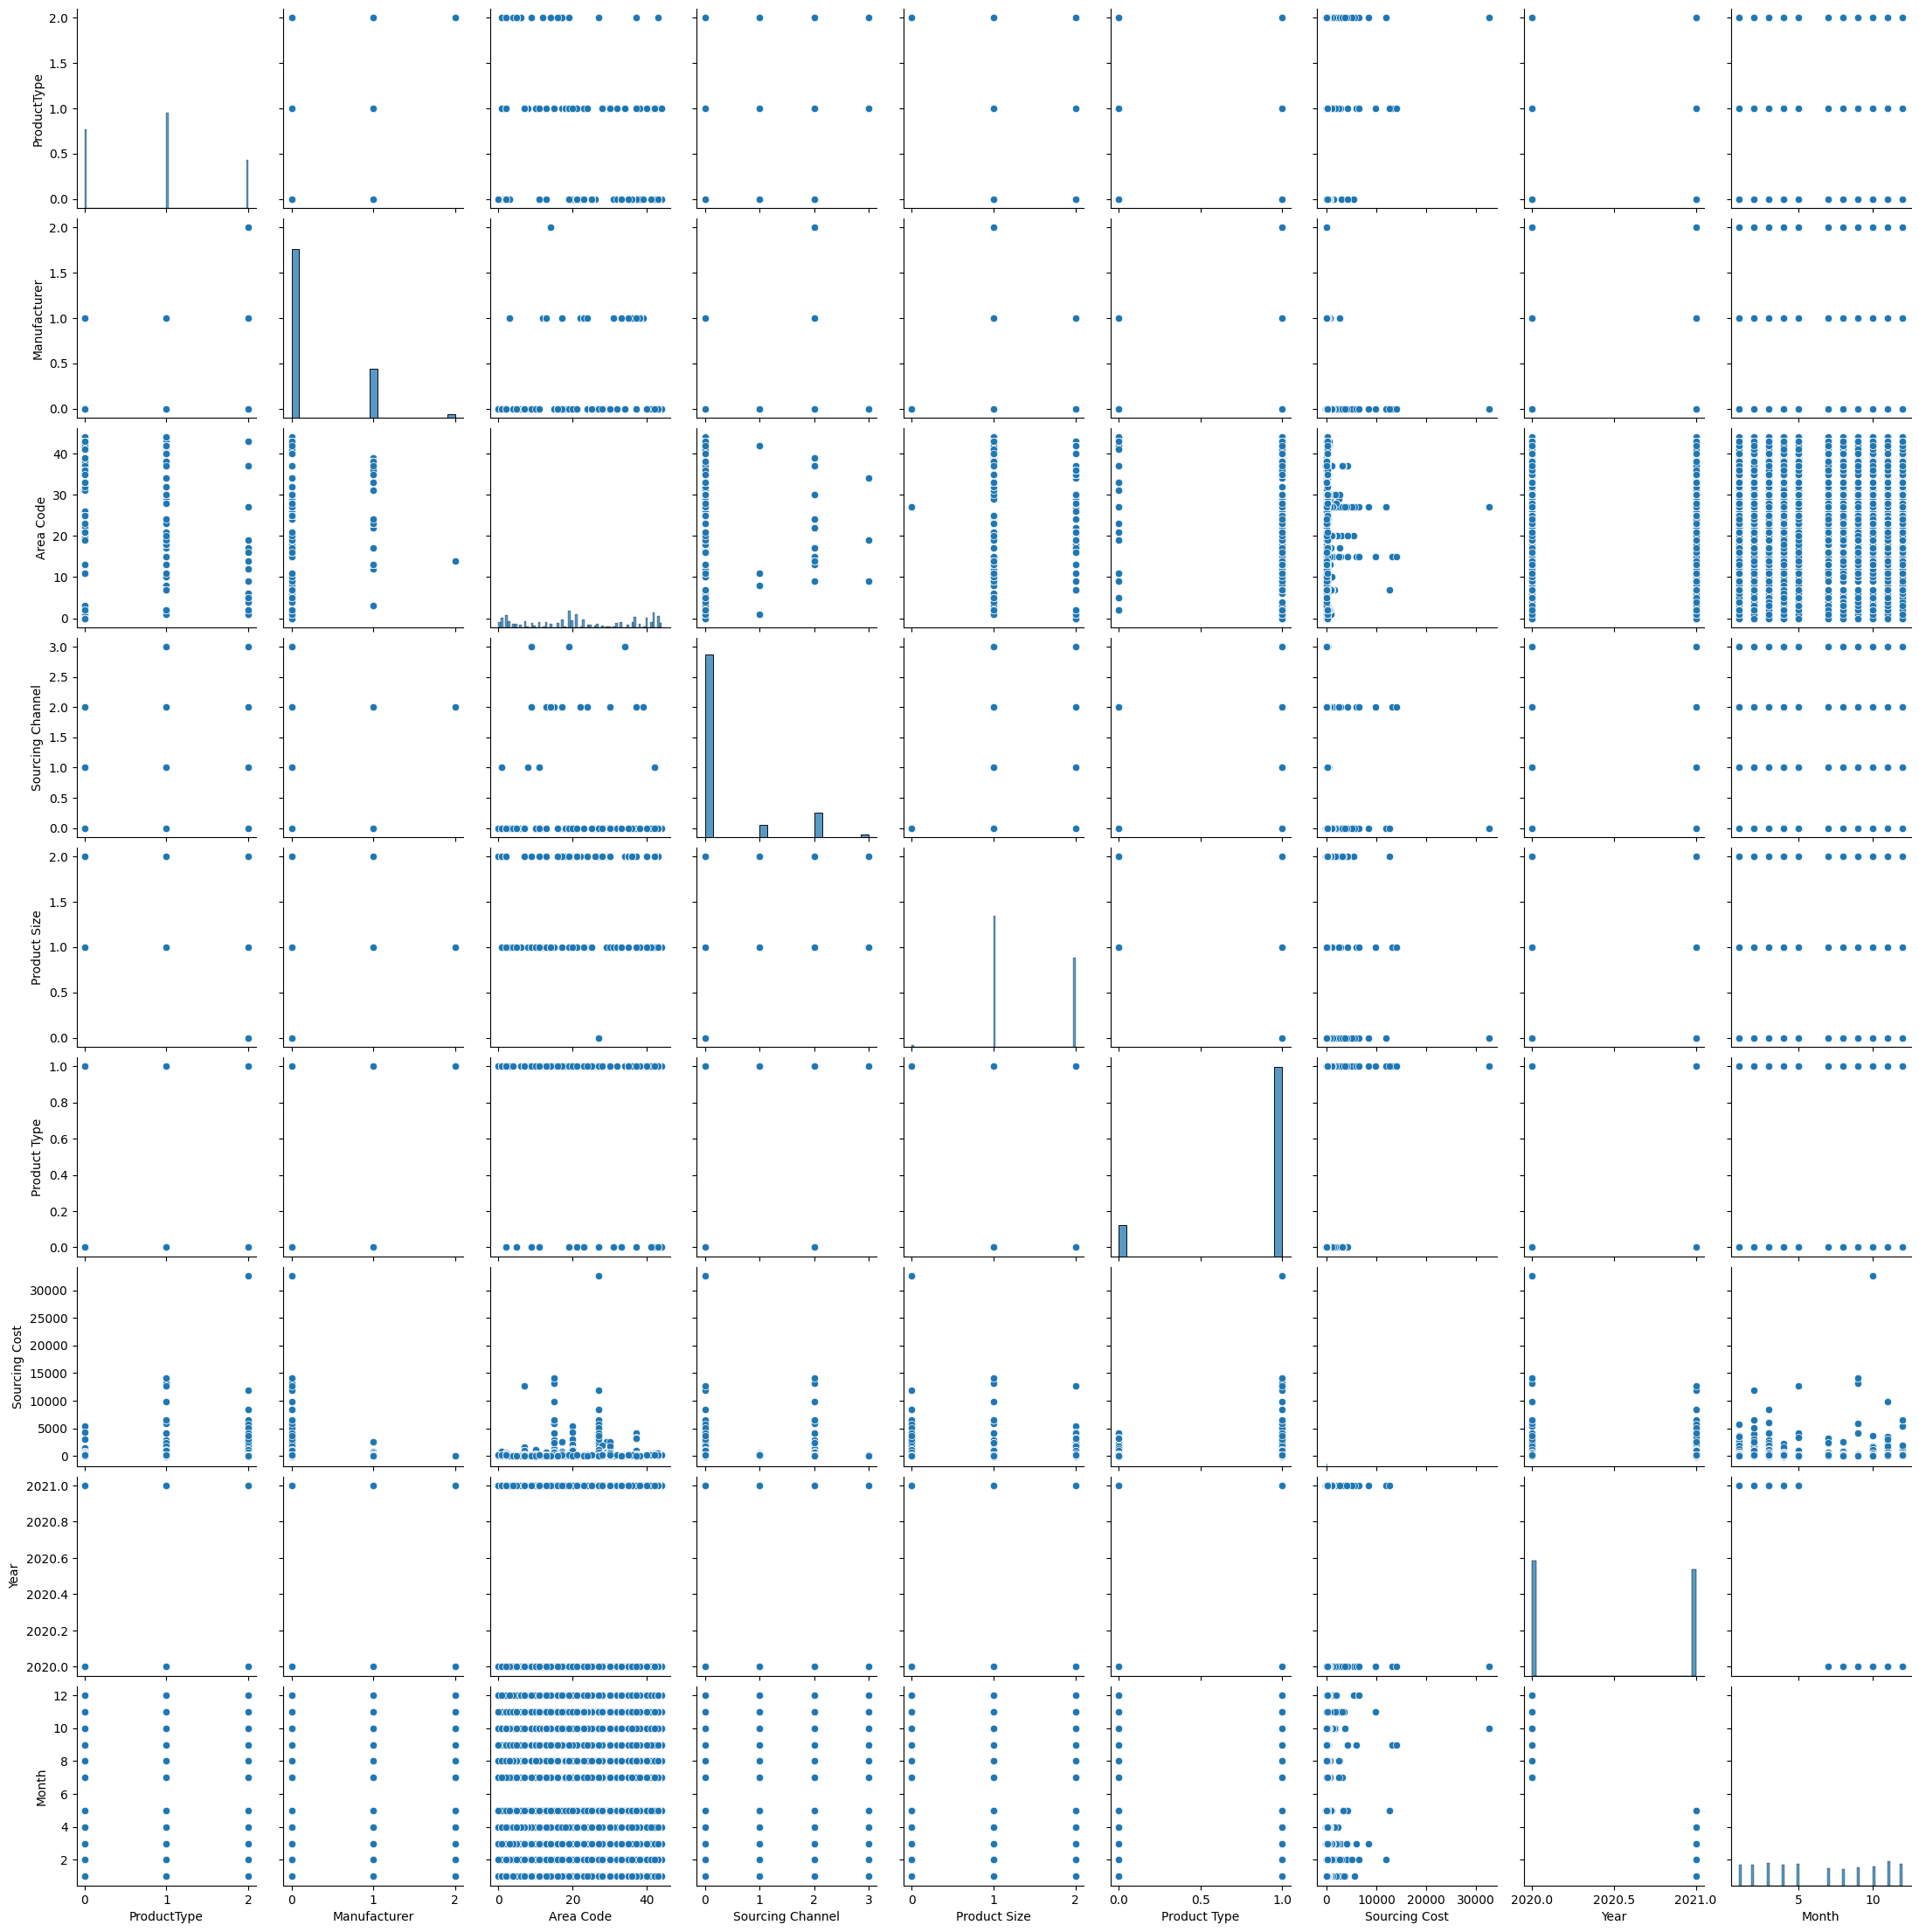

In [31]:
plt.figure(figsize=(10, 6))
sns.pairplot(df_train)
plt.show()

In [32]:
# Split features and target variable
X_train = df_train.drop(columns=['Sourcing Cost'])
y_train = df_train['Sourcing Cost']

In [33]:
df_test = pd.read_csv("/content/DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv")

In [34]:
print(df_test.isnull().sum())

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64


In [35]:
df_test['Month of Sourcing'] = pd.to_datetime(df_test['Month of Sourcing'], format='%b-%y')

In [36]:
df_test.head(10)

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,2021-06-01,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,2021-06-01,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,2021-06-01,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,2021-06-01,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,2021-06-01,169.42
5,NTM1,X1,A2,ECOM,Small,Powder,2021-06-01,169.15
6,NTM1,X1,A28,DIRECT,Small,Powder,2021-06-01,47.99
7,NTM1,X1,A29,DIRECT,Small,Powder,2021-06-01,56.52
8,NTM1,X1,A3,DIRECT,Large,Liquid,2021-06-01,125.51
9,NTM1,X1,A3,DIRECT,Large,Powder,2021-06-01,157.27


In [37]:
df_test['Year'] = df_test['Month of Sourcing'].dt.year
df_test['Month'] = df_test['Month of Sourcing'].dt.month

In [38]:
df_test = df_test.drop(columns=['Month of Sourcing'])

In [39]:
for col in categorical_cols:
    df_test[col] = label_encoder.fit_transform(df_test[col])

In [40]:
df_test.head(10)

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost,Year,Month
0,0,0,0,0,2,1,103.68,2021,6
1,0,0,1,0,1,1,155.75,2021,6
2,0,0,1,1,1,1,143.02,2021,6
3,0,0,2,0,1,1,139.39,2021,6
4,0,0,11,0,1,1,169.42,2021,6
5,0,0,11,1,2,1,169.15,2021,6
6,0,0,19,0,2,1,47.99,2021,6
7,0,0,20,0,2,1,56.52,2021,6
8,0,0,21,0,1,0,125.51,2021,6
9,0,0,21,0,1,1,157.27,2021,6


In [41]:
X_test = df_test.drop(columns=['Sourcing Cost'])
y_test = df_test['Sourcing Cost']

#MODELS

##LINEAR REGRESSION

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [45]:
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 2313.709578603275
Mean Absolute Error (MAE): 37.27802341689557
R^2 Score: 0.1471635384321719


##DECISION TREE

In [46]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [47]:
y_pred_tree = tree_model.predict(X_test)

In [48]:
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

In [49]:
print("Decision Tree Model Evaluation:")
print("Mean Squared Error (MSE):", mse_tree)
print("Mean Absolute Error (MAE):", mae_tree)
print("R^2 Score:", r2_tree)

Decision Tree Model Evaluation:
Mean Squared Error (MSE): 1074.0046737987361
Mean Absolute Error (MAE): 16.576718250669916
R^2 Score: 0.6041204331864509


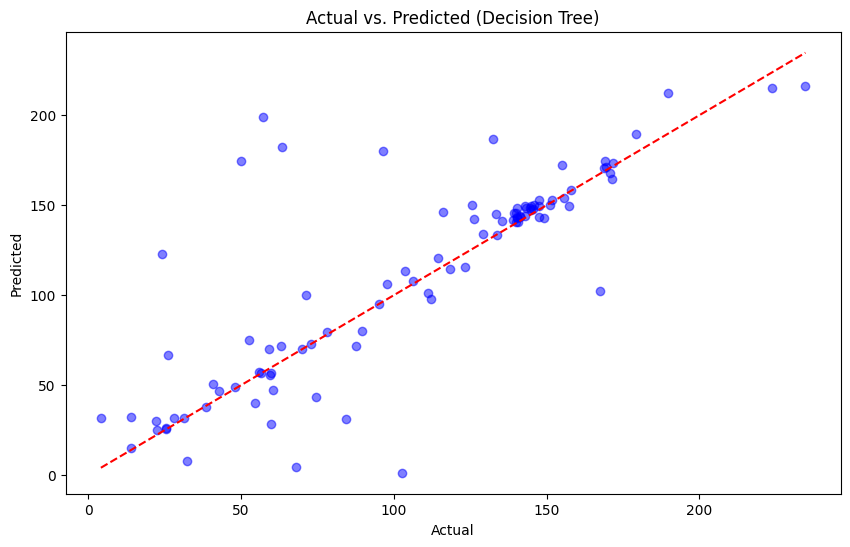

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted (Decision Tree)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

##RANDOM FOREST

In [51]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [52]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [53]:
print("Random Forest Regression Evaluation:")
print("Mean Squared Error (MSE):", mse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R^2 Score:", r2_rf)

Random Forest Regression Evaluation:
Mean Squared Error (MSE): 1064.6981091611935
Mean Absolute Error (MAE): 16.52135973715769
R^2 Score: 0.6075508454249763


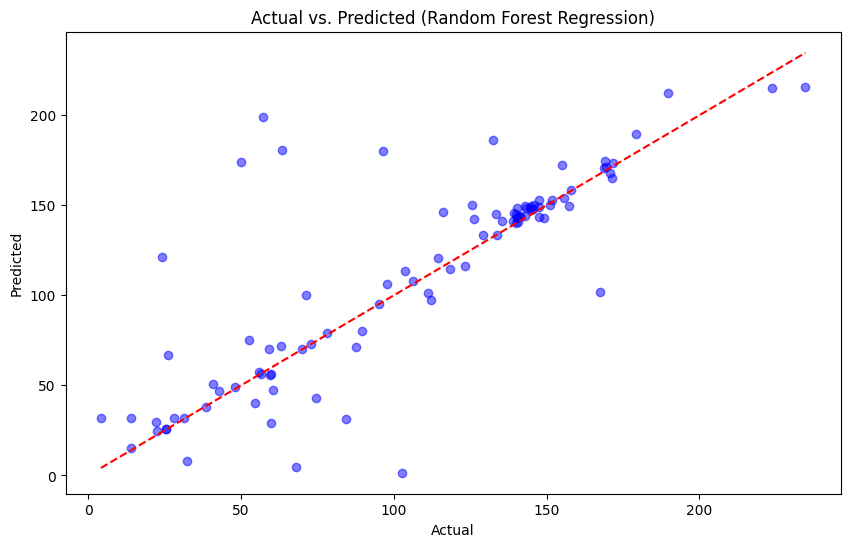

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted (Random Forest Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

##GRADIENT BOOSTING

In [55]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [56]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [57]:
print("\nGradient Boosting Regression Evaluation:")
print("Mean Squared Error (MSE):", mse_gb)
print("Mean Absolute Error (MAE):", mae_gb)
print("R^2 Score:", r2_gb)


Gradient Boosting Regression Evaluation:
Mean Squared Error (MSE): 1364.9083457186014
Mean Absolute Error (MAE): 24.037506558659203
R^2 Score: 0.4968929485827033


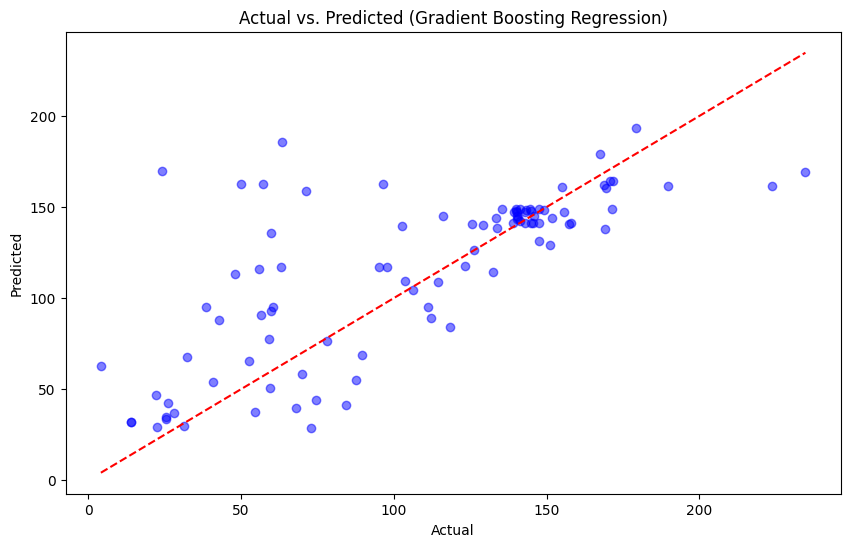

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted (Gradient Boosting Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

##RIDGE

In [59]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)


In [60]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [61]:
print("Ridge Regression Evaluation:")
print("Mean Squared Error (MSE):", mse_ridge)
print("Mean Absolute Error (MAE):", mae_ridge)
print("R^2 Score:", r2_ridge)

Ridge Regression Evaluation:
Mean Squared Error (MSE): 2313.698423402232
Mean Absolute Error (MAE): 37.2779381404498
R^2 Score: 0.14716765025427503


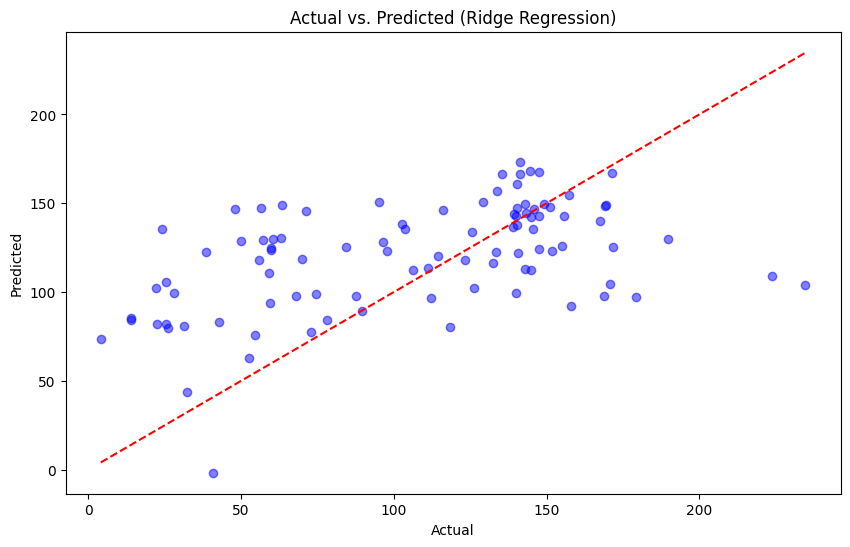

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted (Ridge Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

##Multilayer Perceptron (MLP)

In [63]:
from sklearn.neural_network import MLPRegressor


mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [64]:
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)


In [65]:
print("MLP Regression Evaluation:")
print("Mean Squared Error (MSE):", mse_mlp)
print("Mean Absolute Error (MAE):", mae_mlp)
print("R^2 Score:", r2_mlp)


MLP Regression Evaluation:
Mean Squared Error (MSE): 2233.311698303361
Mean Absolute Error (MAE): 36.32473665967992
R^2 Score: 0.17679830520956663


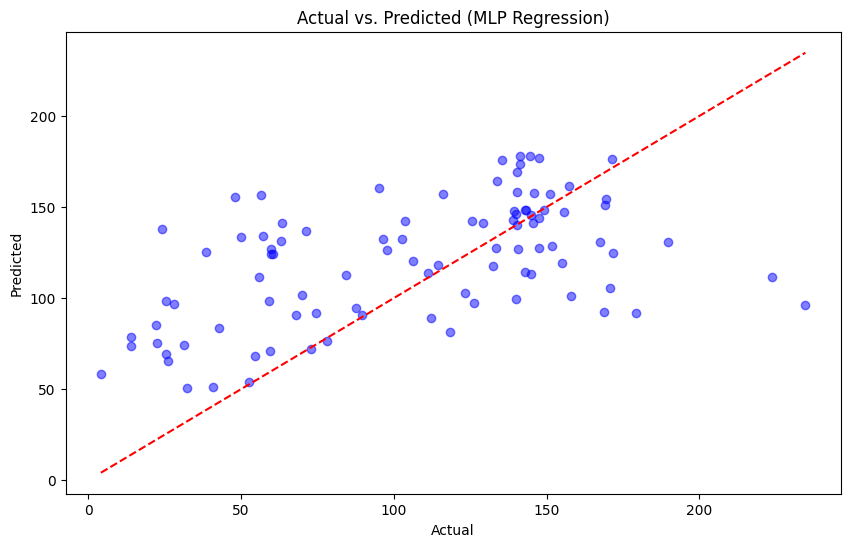

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_mlp, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted (MLP Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#COMPARISION

In [69]:
evaluation_metrics = {
    'Linear Regression': {'MSE': mse, 'MAE': mae, 'R^2': r2},
    'Decision Tree': {'MSE': mse_tree, 'MAE': mae_tree, 'R^2': r2_tree},
    'Random Forest': {'MSE': mse_rf, 'MAE': mae_rf, 'R^2': r2_rf},
    'Gradient Boosting': {'MSE': mse_gb, 'MAE': mae_gb, 'R^2': r2_gb},
    'Ridge Regression': {'MSE': mse_ridge, 'MAE': mae_ridge, 'R^2': r2_ridge},
    'MLP Regression': {'MSE': mse_mlp, 'MAE': mae_mlp, 'R^2': r2_mlp}
}


evaluation_df = pd.DataFrame(evaluation_metrics).T
print("Model Performance Comparison:")
print(evaluation_df)

Model Performance Comparison:
                           MSE        MAE       R^2
Linear Regression  2313.709579  37.278023  0.147164
Decision Tree      1074.004674  16.576718  0.604120
Random Forest      1064.698109  16.521360  0.607551
Gradient Boosting  1364.908346  24.037507  0.496893
Ridge Regression   2313.698423  37.277938  0.147168
MLP Regression     2233.311698  36.324737  0.176798


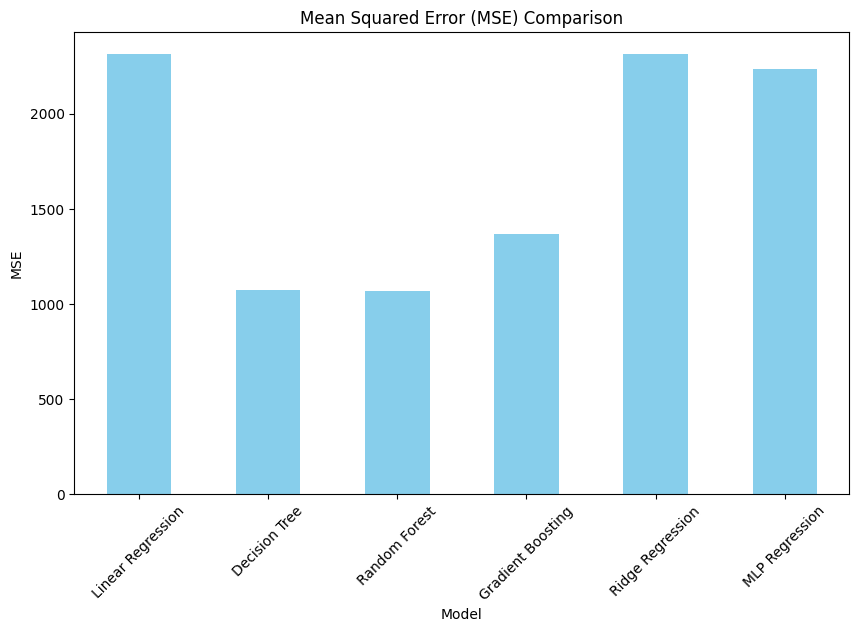

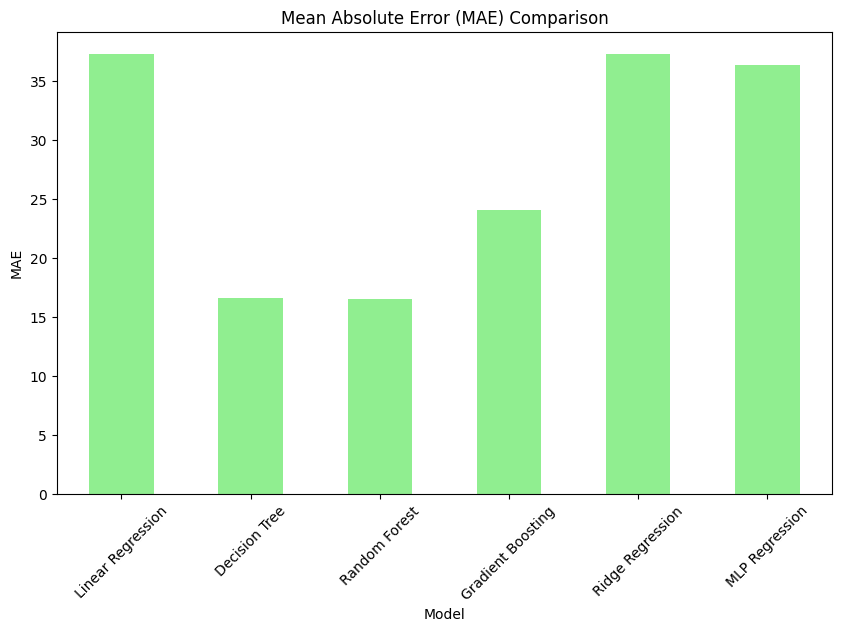

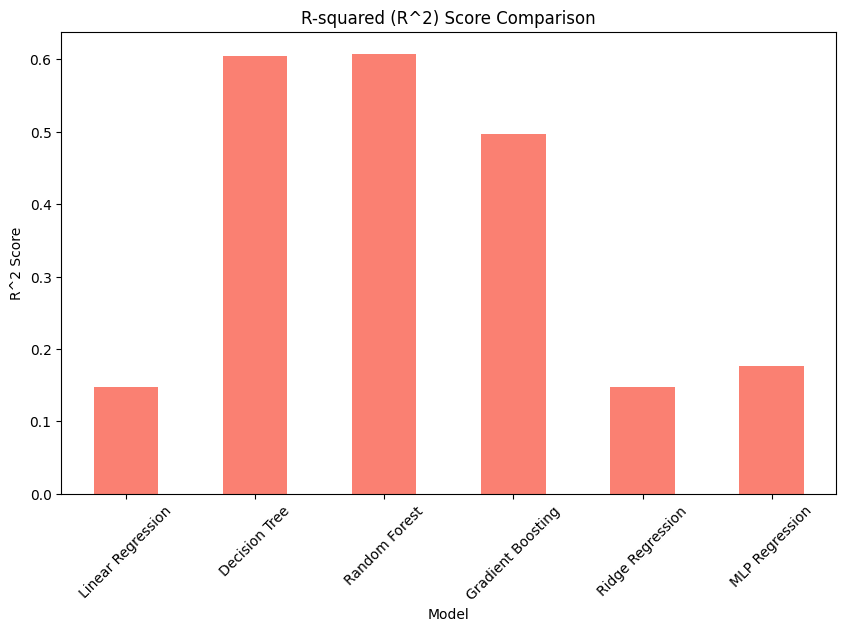

In [70]:

plt.figure(figsize=(10, 6))
evaluation_df['MSE'].plot(kind='bar', color='skyblue')
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
evaluation_df['MAE'].plot(kind='bar', color='lightgreen')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
evaluation_df['R^2'].plot(kind='bar', color='salmon')
plt.title('R-squared (R^2) Score Comparison')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45)
plt.show()

#Linear Regression:

Theory: Linear regression assumes a linear relationship between the independent variables and the target variable. It minimizes the sum of squared residuals to find the best-fitting line.



Strengths: Simple and interpretable, works well with linear relationships, computationally efficient.



Weaknesses: Assumes linearity, sensitive to outliers, may underperform with complex nonlinear relationships.



#Decision Tree Regression:

Theory: Decision trees recursively split the data based on features to minimize impurity (e.g., variance). Each leaf node represents a prediction.



Strengths: Can capture complex nonlinear relationships, handles interactions well, interpretable.



Weaknesses: Prone to overfitting, sensitive to small variations in data, lack of smoothness.




#Random Forest Regression:

Theory: Random forest builds multiple decision trees and averages their predictions to reduce overfitting and improve robustness.



Strengths: Reduces overfitting compared to decision trees, robust to outliers, handles high-dimensional data well.


Weaknesses: Less interpretable than decision trees, slower training time compared to decision trees.



#Gradient Boosting Regression:

Theory: Gradient boosting builds an ensemble of weak learners (usually decision trees) sequentially, where each subsequent model corrects the errors of the previous one.



Strengths: Can capture complex relationships, often provides high predictive accuracy, robust to outliers.



Weaknesses: May be prone to overfitting, sensitive to hyperparameters, computationally intensive.



#Support Vector Regression (SVR):

Theory: SVR finds the hyperplane that maximizes the margin while keeping deviations (errors) within a certain threshold (epsilon).



Strengths: Effective in high-dimensional spaces, robust to overfitting, works well with nonlinear data using kernel tricks.


Weaknesses: Requires careful selection of kernel and hyperparameters, memory-intensive for large datasets, less interpretable.



#Ridge Regression:

Theory: Ridge regression adds a penalty term (L2 regularization) to the linear regression objective function to shrink coefficients and reduce overfitting.



Strengths: Helps prevent overfitting, stabilizes coefficients, robust to multicollinearity.



Weaknesses: Assumes all features are relevant, may not perform well if the true relationship is sparse or nonlinear.



#Multilayer Perceptron (MLP) Regression:

Theory: MLP is a type of artificial neural network composed of multiple layers of nodes (neurons) that process information using nonlinear activation functions.



Strengths: Capable of capturing complex nonlinear relationships, scalable to large datasets, robust to noisy data.



Weaknesses: Requires tuning of hyperparameters, computationally intensive, prone to overfitting with large networks.

##Linear Regression:

MSE: 2313.71



MAE: 37.28



R^2: 0.147



Linear regression performs the worst among the models in terms of R^2, indicating that it doesn't capture the variability in the data well.



##Decision Tree:

MSE: 1074.00




MAE: 16.58



R^2: 0.604



Decision tree performs better than linear regression, showing a higher R^2 value, indicating it captures more variance in the data.



##Random Forest:

MSE: 1064.70



MAE: 16.52



R^2: 0.608



Random forest further improves upon decision trees, with slightly better MSE and R^2 values.



##Gradient Boosting:

MSE: 1364.91



MAE: 24.04



R^2: 0.497



Gradient boosting performs well but slightly worse than random forest in terms of MSE and R^2.



##Ridge Regression:

MSE: 2313.70




MAE: 37.28



R^2: 0.147



Ridge regression performs similarly to linear regression, as it's a regularized version of linear regression.



##MLP Regression:

MSE: 2233.31



MAE: 36.32



R^2: 0.177



MLP regression performs better than linear regression but worse than decision tree-based models in terms of R^2.






The Best Model to Choose: Based on the provided metrics, the Random Forest model seems to be the best choice. It has the lowest MSE, lowest MAE, and the highest R^2 value among the models, indicating better overall performance in terms of predictive accuracy and variance explained.





Reasoning: Random forests are ensemble methods that combine multiple decision trees, which helps to reduce overfitting and improve generalization. They are robust, handle non-linear relationships well, and are less sensitive to outliers compared to other models. The higher R^2 value indicates that random forest captures more variability in the data, making it a reliable choice for predicting sourcing costs based on label-encoded data.